In [ ]:
print("ÏPCV Lab expt 3    4th sept")
print("Dhwaj Jain S012")

ÏPCV Lab expt 3



In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img=cv2.imread("delivey.jpg",cv2.IMREAD_GRAYSCALE)

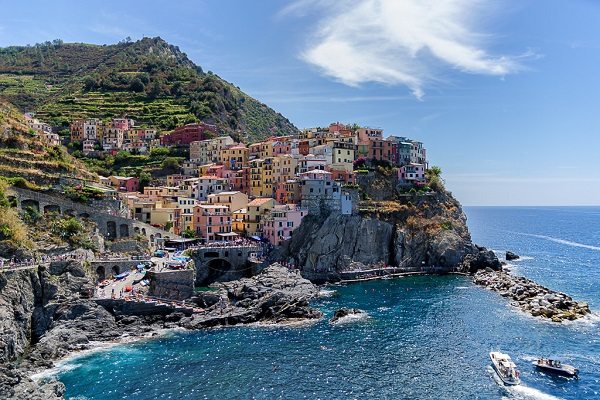

In [ ]:
img=cv2.imread("img_5terre.jpg")
cv2_imshow(img)

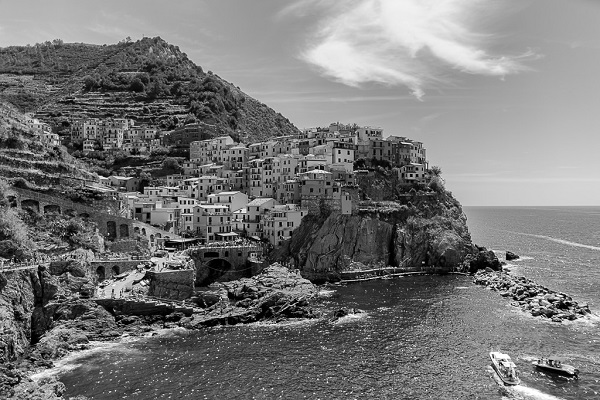

In [ ]:
grayimg=cv2.imread("img_5terre.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(grayimg)

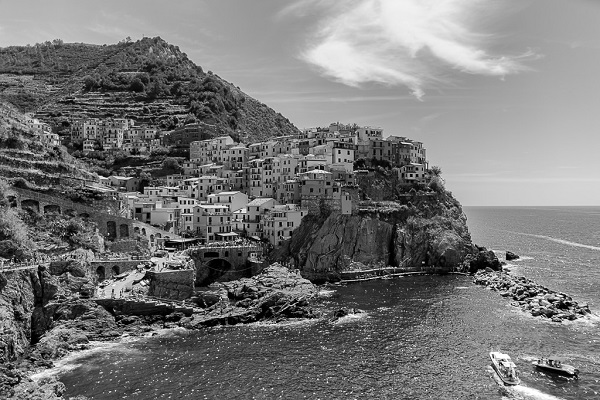

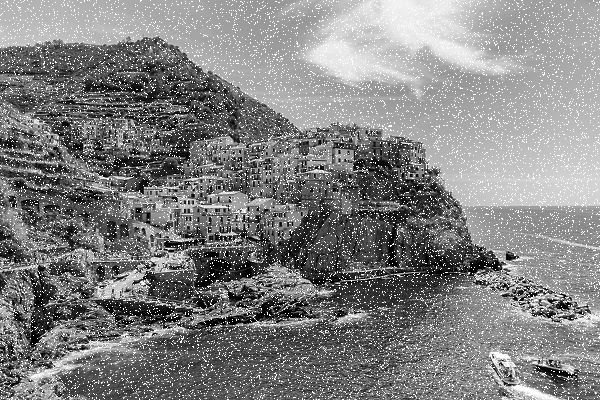

In [ ]:
def add_gaussian_noise(grayimg, mean=0, std=25):
    noise = np.random.normal(mean, std, grayimg.shape).astype(np.uint8)
    noisy_image = cv2.add(grayimg, noise)
    return noisy_image

noisy_image = add_gaussian_noise(grayimg, mean=0, std=0.7)

cv2_imshow(grayimg)
cv2_imshow(noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

removing gaussian noise using average

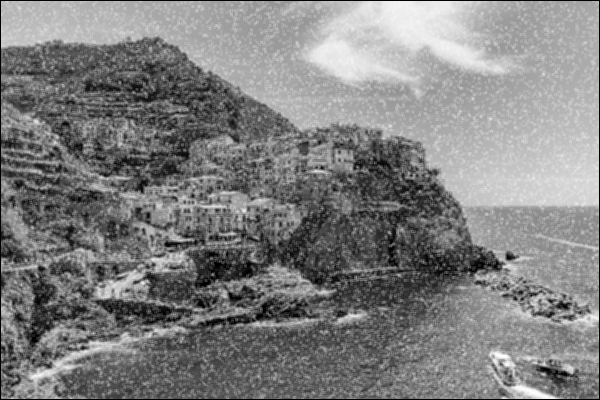

In [ ]:
m, n = noisy_image.shape

mask = np.ones([3, 3], dtype = int)
mask = mask / 9

denog = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = noisy_image[i-1, j-1]*mask[0, 0]+noisy_image[i-1, j]*mask[0, 1]+noisy_image[i-1, j + 1]*mask[0, 2]+noisy_image[i, j-1]*mask[1, 0]+ noisy_image[i, j]*mask[1, 1]+noisy_image[i, j + 1]*mask[1, 2]+noisy_image[i + 1, j-1]*mask[2, 0]+noisy_image[i + 1, j]*mask[2, 1]+noisy_image[i + 1, j + 1]*mask[2, 2]

        denog[i, j]= temp

denog = denog.astype(np.uint8)
cv2_imshow( denog)
cv2.waitKey(0)
cv2.destroyAllWindows()

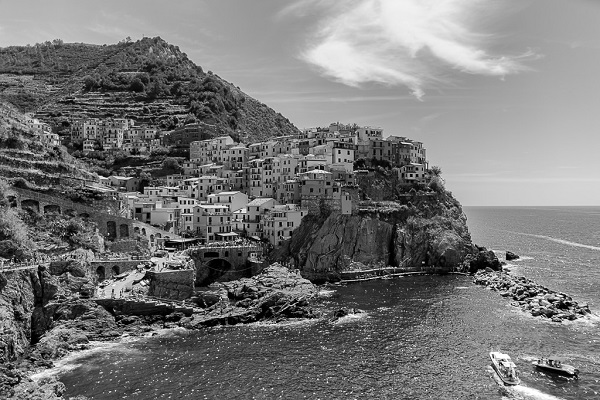

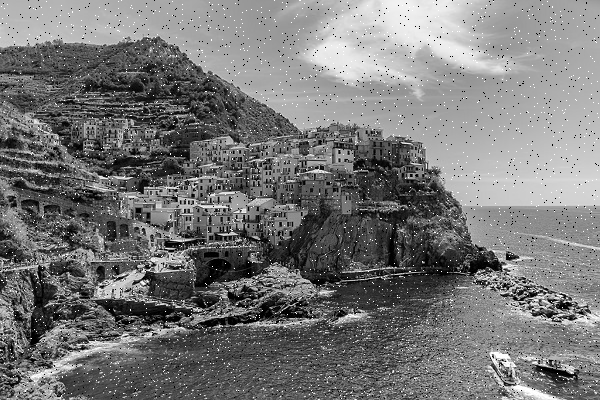

In [ ]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(total_pixels * salt_prob).astype(int)
    num_pepper = np.ceil(total_pixels * pepper_prob).astype(int)

    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

salt_prob = 0.01
pepper_prob = 0.01
noisy_gray_image_sp = add_salt_and_pepper_noise(grayimg, salt_prob, pepper_prob)

cv2_imshow(grayimg)
cv2_imshow(noisy_gray_image_sp)

cv2.waitKey(0)
cv2.destroyAllWindows()

removing s n p noise using median

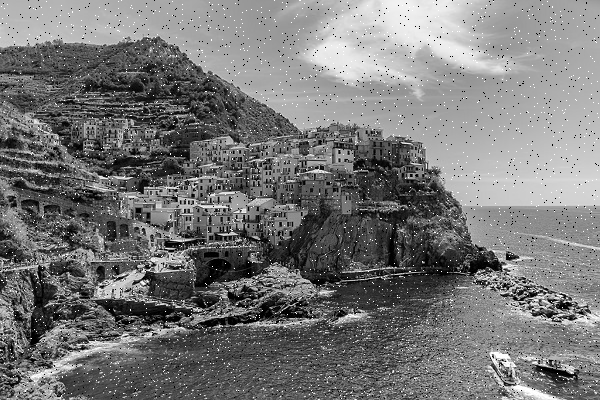

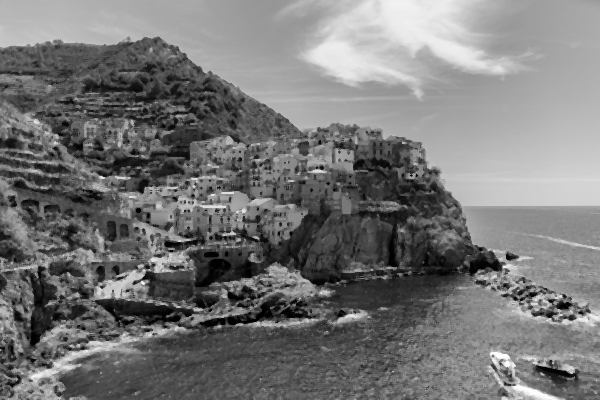

In [ ]:
m, n = noisy_gray_image_sp.shape

# Create an output image for the filtered result
denoised_image_sp_manual = np.zeros([m, n])

# Pad the image to handle border effects
padded_img = cv2.copyMakeBorder(noisy_gray_image_sp, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

# Apply the median filter manually
for i in range(m):
    for j in range(n):
        # Extract the 3x3 region
        region = padded_img[i:i+3, j:j+3]
        # Calculate the median of the region
        median_value = np.median(region)
        # Assign the median value to the output image
        denoised_image_sp_manual[i, j] = median_value

# Convert the result to uint8
denoised_image_sp_manual = denoised_image_sp_manual.astype(np.uint8)

# Display the noisy image and the denoised image
cv2_imshow(noisy_gray_image_sp)
cv2_imshow(denoised_image_sp_manual)

cv2.waitKey(0)
cv2.destroyAllWindows()

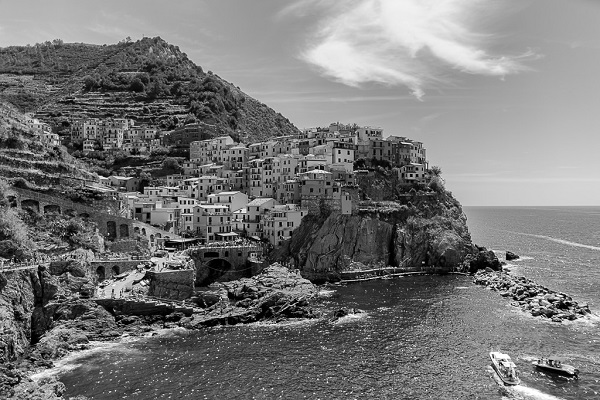

In [ ]:
cv2_imshow(grayimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

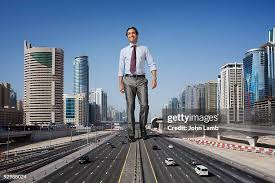

In [ ]:
img=cv2.imread("guyguy.jpg")
cv2_imshow(img)

In [ ]:
img2=cv2.imread("guyguy.jpg",cv2.IMREAD_GRAYSCALE)

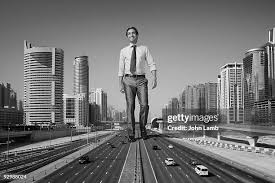

In [ ]:
cv2_imshow(img2)

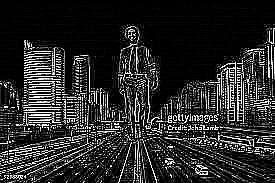

In [ ]:
m, n = img2.shape

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])


high_pass_img = np.zeros([m, n])

padded_img = cv2.copyMakeBorder(img2, 1, 1, 1, 1, cv2.BORDER_REPLICATE)


for i in range(m):
    for j in range(n):

        region = padded_img[i:i+3, j:j+3]

        convolution_result = np.sum(region * kernel)

        high_pass_img[i, j] = convolution_result


high_pass_img = np.clip(high_pass_img, 0, 255)

high_pass_img = high_pass_img.astype(np.uint8)

cv2_imshow(high_pass_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

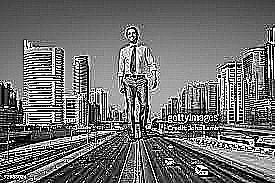

In [ ]:
m, n = img2.shape

kernel = np.array([[-1, -1, -1],
                   [-1,  8.9, -1],
                   [-1, -1, -1]])


high_pass_img = np.zeros([m, n])

padded_img = cv2.copyMakeBorder(img2, 1, 1, 1, 1, cv2.BORDER_REPLICATE)


for i in range(m):
    for j in range(n):

        region = padded_img[i:i+3, j:j+3]

        convolution_result = np.sum(region * kernel)

        high_pass_img[i, j] = convolution_result


high_pass_img = np.clip(high_pass_img, 0, 255)

high_pass_img = high_pass_img.astype(np.uint8)

cv2_imshow(high_pass_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Conclusion**

This experiment successfully implemented spatial domain smoothing techniques, demonstrating that averaging filters effectively remove Gaussian noise through low-pass filtering while median filters excel at eliminating salt-and-pepper noise without significantly blurring image edges. The median filter, as an order-statistic nonlinear filter, preserves edge sharpness by replacing center pixels with neighborhood median values rather than mean values, making it superior for impulse noise removal compared to averaging filters. Additionally, the implementation of a high-pass filter for edge enhancement complemented these noise reduction techniques, illustrating fundamental spatial filtering concepts essential for image preprocessing and feature extraction in computer vision applications

end. v2